In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
gdp = pd.read_csv("GDP.csv")
gdi = pd.read_csv("GDI.csv")

In [4]:
gdp

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742
...,...,...
298,2021-07-01,23550.420
299,2021-10-01,24349.121
300,2022-01-01,24740.480
301,2022-04-01,25248.476


In [5]:
gdi

,DATE,GDI
0,1947-01-01,240.092
1,1947-04-01,243.209
2,1947-07-01,247.579
3,1947-10-01,256.122
4,1948-01-01,265.072
...,...,...
297,2021-04-01,23071.192
298,2021-07-01,23683.944
299,2021-10-01,24473.326
300,2022-01-01,25017.498


In [6]:
gdp["datetime"] = pd.to_datetime(gdp["DATE"])
gdp["year"] = pd.DatetimeIndex(gdp["datetime"]).year
gdp["quarter"] = pd.DatetimeIndex(gdp["datetime"]).quarter

gdi["datetime"] = pd.to_datetime(gdi["DATE"])
gdi["year"] = pd.DatetimeIndex(gdi["datetime"]).year
gdi["quarter"] = pd.DatetimeIndex(gdi["datetime"]).quarter

In [7]:
gdp_annual = gdp.groupby(["year"]).sum()
gdp_annual.drop(["quarter"], axis=1, inplace=True)

gdp_annual["GDI"] = gdi.groupby(["year"]).sum()["GDI"]
gdp_annual["ratio"] = gdp_annual["GDI"]/gdp_annual["GDP"]
gdp_annual["ratio"]

year
1947    0.988522
1948    1.000927
1949    0.993613
1950    0.995788
1951    0.990074
          ...   
2018    1.005552
2019    1.004935
2020    1.010205
2021    1.005530
2022    0.668705
Name: ratio, Length: 76, dtype: float64

In [8]:
gdp["gdi"] = gdi["GDI"]
gdp["annual_gdp"] = gdp.groupby(["year"])["GDP"].transform(np.sum)
gdp["annual_gdi"] = gdp.groupby(["year"])["gdi"].transform(np.sum)
gdp["ratio"] = gdp["annual_gdi"]/gdp["annual_gdp"]
gdp

,DATE,GDP,datetime,year,quarter,gdi,annual_gdp,annual_gdi,ratio
0,1947-01-01,243.164,1947-01-01,1947,1,240.092,998.462,987.002,0.988522
1,1947-04-01,245.968,1947-04-01,1947,2,243.209,998.462,987.002,0.988522
2,1947-07-01,249.585,1947-07-01,1947,3,247.579,998.462,987.002,0.988522
3,1947-10-01,259.745,1947-10-01,1947,4,256.122,998.462,987.002,0.988522
4,1948-01-01,265.742,1948-01-01,1948,1,265.072,1097.871,1098.889,1.000927
...,...,...,...,...,...,...,...,...,...
298,2021-07-01,23550.420,2021-07-01,2021,3,23683.944,93260.325,93776.094,1.005530
299,2021-10-01,24349.121,2021-10-01,2021,4,24473.326,93260.325,93776.094,1.005530
300,2022-01-01,24740.480,2022-01-01,2022,1,25017.498,75652.245,50589.051,0.668705
301,2022-04-01,25248.476,2022-04-01,2022,2,25571.553,75652.245,50589.051,0.668705


In [9]:
gdp["estimated_gdp"] = gdp["gdi"] * (1/gdp["ratio"])
gdp

,DATE,GDP,datetime,year,quarter,gdi,annual_gdp,annual_gdi,ratio,estimated_gdp
0,1947-01-01,243.164,1947-01-01,1947,1,240.092,998.462,987.002,0.988522,242.879689
1,1947-04-01,245.968,1947-04-01,1947,2,243.209,998.462,987.002,0.988522,246.032880
2,1947-07-01,249.585,1947-07-01,1947,3,247.579,998.462,987.002,0.988522,250.453620
3,1947-10-01,259.745,1947-10-01,1947,4,256.122,998.462,987.002,0.988522,259.095812
4,1948-01-01,265.742,1948-01-01,1948,1,265.072,1097.871,1098.889,1.000927,264.826440
...,...,...,...,...,...,...,...,...,...,...
298,2021-07-01,23550.420,2021-07-01,2021,3,23683.944,93260.325,93776.094,1.005530,23553.682186
299,2021-10-01,24349.121,2021-10-01,2021,4,24473.326,93260.325,93776.094,1.005530,24338.722581
300,2022-01-01,24740.480,2022-01-01,2022,1,25017.498,75652.245,50589.051,0.668705,37411.848030
301,2022-04-01,25248.476,2022-04-01,2022,2,25571.553,75652.245,50589.051,0.668705,38240.396970


/var/folders/n3/82nc6jxd7bn0cvmv4f0t48340000gn/T/ipykernel_49591/2056920530.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp["percent_ratio"] = gdp["error"]/gdp["GDP"]


<AxesSubplot: xlabel='Count', ylabel='percent_ratio'>

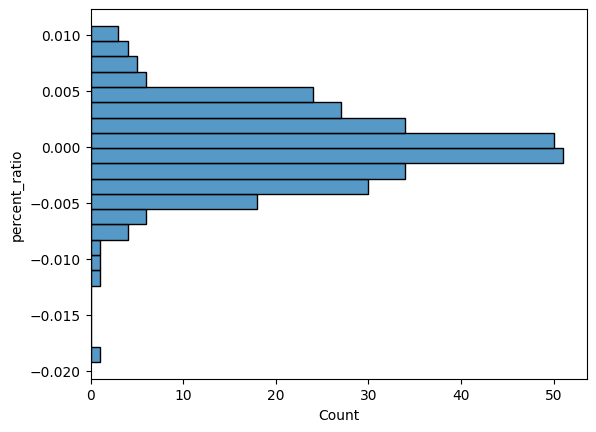

In [10]:
gdp["error"] = gdp["estimated_gdp"] - gdp["GDP"]
gdp = gdp[gdp["year"] < 2022]
gdp["percent_ratio"] = gdp["error"]/gdp["GDP"]
sns.histplot(gdp, y="percent_ratio")

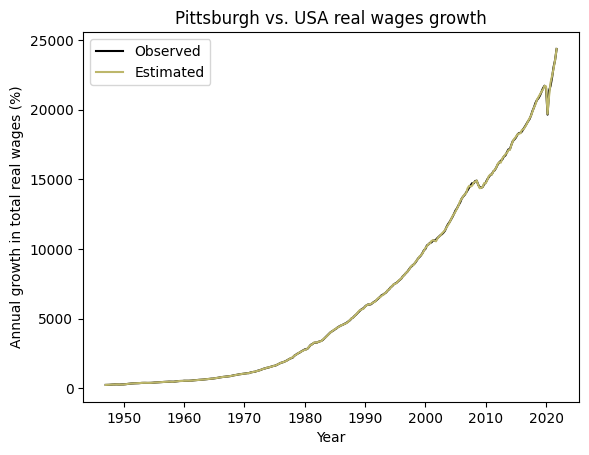

In [20]:
x = gdp["datetime"]
y1 = gdp["GDP"]
y2 = gdp["estimated_gdp"]
fig, ax = plt.subplots(1, 1)
ax.set_title("Pittsburgh vs. USA real wages growth")
ax.plot(x, y1, color="black", label="Observed")
ax.plot(x, y2, color="darkkhaki", label="Estimated")
ax.fill_between(x, y1, y2, where=(y1 > y2), color='black', alpha=0.3, interpolate=True)
ax.fill_between(x, y1, y2, where=(y1 < y2), color='gold', alpha=0.3, interpolate=True)
ax.set_ylabel("Annual growth in total real wages (%)")
ax.set_xlabel("Year")

ax.legend()

## pog estimate